# Full Plasma (Core + Edge profiles)

This notebook demonstrates how to load and visualize a plasma object produced by `cherab`'s `Plasma` class using the `cherab.imas` interface.

The example test data was calculated by JINTRAC for an ITER 15 MA H-mode scenario.

Prerequisites: [Pooch](https://www.fatiando.org/pooch/) must be installed to download the example data.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import SymLogNorm

from cherab.core.math import sample3d, sample3d_grid
from cherab.imas.datasets import iter_jintrac
from cherab.imas.plasma import load_plasma

# Set dark background for plots
plt.style.use("dark_background")

22:32:44 CRITICAL Could not import 'imas_core': No module named 'imas_core'. Some functionality is not available. @imas_interface.py:34


## Define a function to plot plasma quantities

In [2]:
def plot_quantity(
    quantity,
    extent,
    title="",
    clabel="",
    logscale=False,
    symmetric=False,
):
    """Make a 2D plot of quantity, optionally on a log scale."""

    fig, ax = plt.subplots(
        dpi=150,
        figsize=(4.0, 6.0),
        layout="constrained",
    )
    if logscale:
        # Plot lowest values (mainly 0's) on linear map, as log(0) = -inf.
        linthresh = np.percentile(np.unique(quantity), 1)
        norm = SymLogNorm(
            linthresh=float(max(linthresh, 1.0e-10 * quantity.max())),
            base=10,
        )
    else:
        norm = None
    # Sampled data is indexed as quantity(x, y),
    # but matplotlib's imshow expects quantity(y, x).
    if symmetric and not logscale:
        vmax = np.abs(quantity).max()
        image = ax.imshow(
            quantity.T,
            extent=extent,
            origin="lower",
            vmin=-vmax,
            vmax=vmax,
            cmap="berlin",
        )
    else:
        image = ax.imshow(
            quantity.T,
            extent=extent,
            origin="lower",
            norm=norm,
            cmap="gnuplot",
        )
    cbar = plt.colorbar(image, aspect=50)
    cbar.set_label(clabel)
    ax.set_xlim(extent[0], extent[1])
    ax.set_ylim(extent[2], extent[3])
    ax.set_xlabel("$R$ [m]")
    ax.set_ylabel("$Z$ [m]")
    ax.set_title(title)

    return fig

## Retrieve ITER JINTRAC sample data

In [3]:
path = iter_jintrac()

## Load the plasma object
The instance of the `~cherab.core.plasma.node.Plasma` class is created by loading the `core_profiles` and `edge_profiles` IDSs from the IMAS database.

The equilibrium information is automatically loaded from the `equilibrium` IDS if not already provided.

In [4]:
plasma = load_plasma(path, "r")

22:32:44 INFO     Parsing data dictionary version 4.1.0 @dd_zip.py:89


22:32:44 INFO     Parsing data dictionary version 4.0.0 @dd_zip.py:89


/home/runner/work/imas/imas/src/cherab/imas/plasma/blend.py:140: RuntimeWarning: The 'get_slice' method is not implemented for the URI '/home/runner/.cache/cherab/imas/iter_scenario_53298_seq1_DD4.nc'. Falling back to 'get' method to retrieve the entire IDS.
  core_profiles_ids = get_ids_time_slice(
/home/runner/work/imas/imas/src/cherab/imas/plasma/blend.py:162: RuntimeWarning: The 'get_slice' method is not implemented for the URI '/home/runner/.cache/cherab/imas/iter_scenario_53298_seq1_DD4.nc'. Falling back to 'get' method to retrieve the entire IDS.
  edge_profiles_ids = get_ids_time_slice(


/home/runner/work/imas/imas/src/cherab/imas/plasma/equilibrium.py:71: RuntimeWarning: The 'get_slice' method is not implemented for the URI '/home/runner/.cache/cherab/imas/iter_scenario_53298_seq1_DD4.nc'. Falling back to 'get' method to retrieve the entire IDS.
  equilibrium_ids = get_ids_time_slice(
/home/runner/work/imas/imas/src/cherab/imas/plasma/equilibrium.py:150: RuntimeWarning: The 'get_slice' method is not implemented for the URI '/home/runner/.cache/cherab/imas/iter_scenario_53298_seq1_DD4.nc'. Falling back to 'get' method to retrieve the entire IDS.
  equilibrium_ids = get_ids_time_slice(


Warning! Unable to verify that the cell nodes are in the winging order.
Warning! Using average ion temperature for the DT ion.
Warning! Using average ion temperature for the He+1 ion.
Warning! Using average ion temperature for the He+2 ion.
Warning! Using average ion temperature for the Ne(bundle 1) ion.
Warning! Using average ion temperature for the Ne(bundle 5) ion.
Warning! Using average ion temperature for the W(bundle 1) ion.
Warning! Using average ion temperature for the W(bundle 6) ion.
Warning! Using average ion temperature for the Ne(bundle 2) ion_bundle.
Warning! Using average ion temperature for the Ne(bundle 3) ion_bundle.
Warning! Using average ion temperature for the Ne(bundle 4) ion_bundle.
Warning! Using average ion temperature for the W(bundle 2) ion_bundle.
Warning! Using average ion temperature for the W(bundle 3) ion_bundle.
Warning! Using average ion temperature for the W(bundle 4) ion_bundle.
Warning! Using average ion temperature for the W(bundle 5) ion_bundle.
W

The loaded plasma object contains both core and edge profiles and all available species information shown below.

In [5]:
for s in plasma.composition:
    print(s)

<Species: element=deuterium, charge=1>
<Species: element=tritium, charge=1>
<Species: element=helium, charge=1>
<Species: element=helium, charge=2>
<Species: element=tungsten, charge=1>
<Species: element=deuterium, charge=0>
<Species: element=tritium, charge=0>
<Species: element=helium, charge=0>
<Species: element=neon, charge=0>
<Species: element=tungsten, charge=0>
<Species: element=neon, charge=1>
<Species: element=neon, charge=10>
<Species: element=tungsten, charge=74>


## Plot several species' profiles

Define some constants related to sampling and plotting.

In [6]:
R_MIN, R_MAX = 4.0, 8.5
Z_MIN, Z_MAX = -4.5, 4.6
RES = 0.005  # resolution of grid in [m]
n_r = round((R_MAX - R_MIN) / RES) + 1
n_z = round((Z_MAX - Z_MIN) / RES) + 1
extent = [R_MIN, R_MAX, Z_MIN, Z_MAX]

### Electron density and temperature

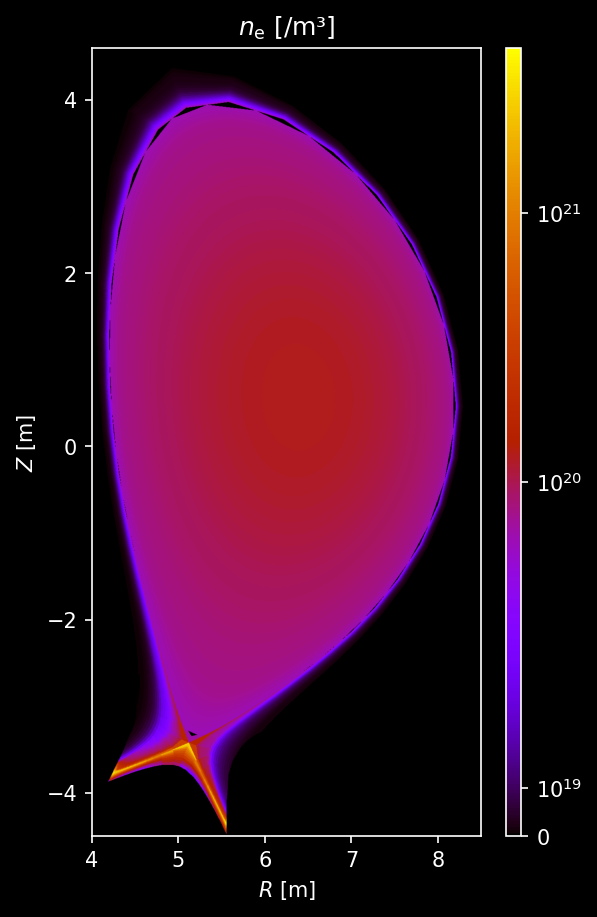

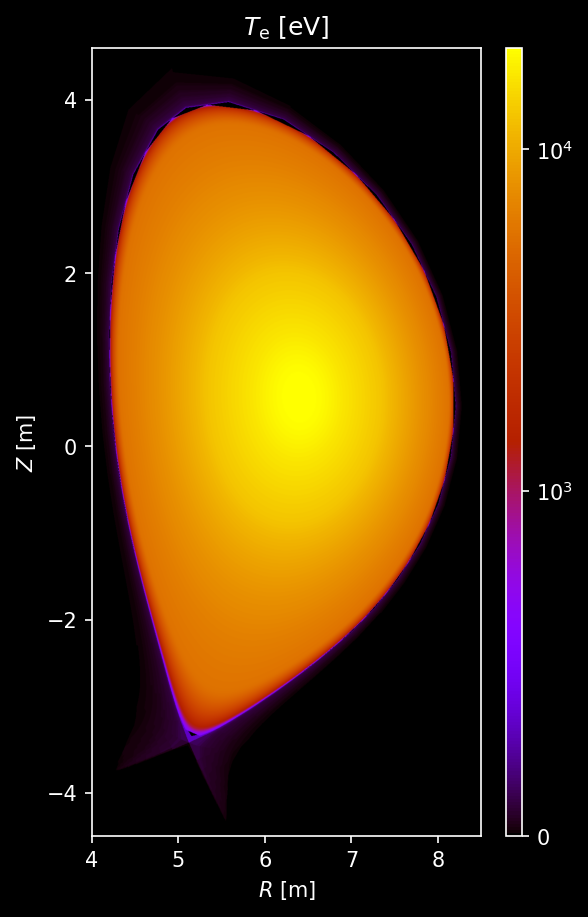

In [7]:
# Sample electron density
r_pts, _, z_pts, n_e = sample3d(
    plasma.electron_distribution.density,
    (R_MIN, R_MAX, n_r),
    (0, 0, 1),
    (Z_MIN, Z_MAX, n_z),
)
n_e = n_e.squeeze()

# Plot electron density
fig = plot_quantity(
    n_e,
    extent,
    title="$n_\\mathrm{e}$ [/m³]",
    logscale=True,
)

# Sample electron temperature
te_plasma = sample3d_grid(
    plasma.electron_distribution.effective_temperature,
    r_pts,
    [0],
    z_pts,
).squeeze()

# Plot electron temperature
fig = plot_quantity(
    te_plasma,
    extent,
    title="$T_\\mathrm{e}$ [eV]",
    logscale=True,
)

### Hydrogenic species (H, D, T) density and temperature

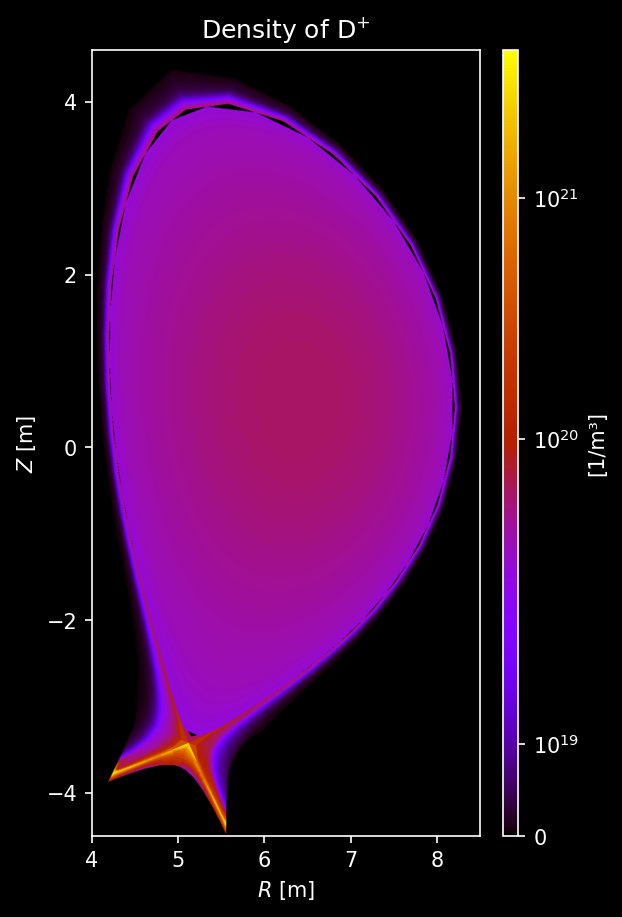

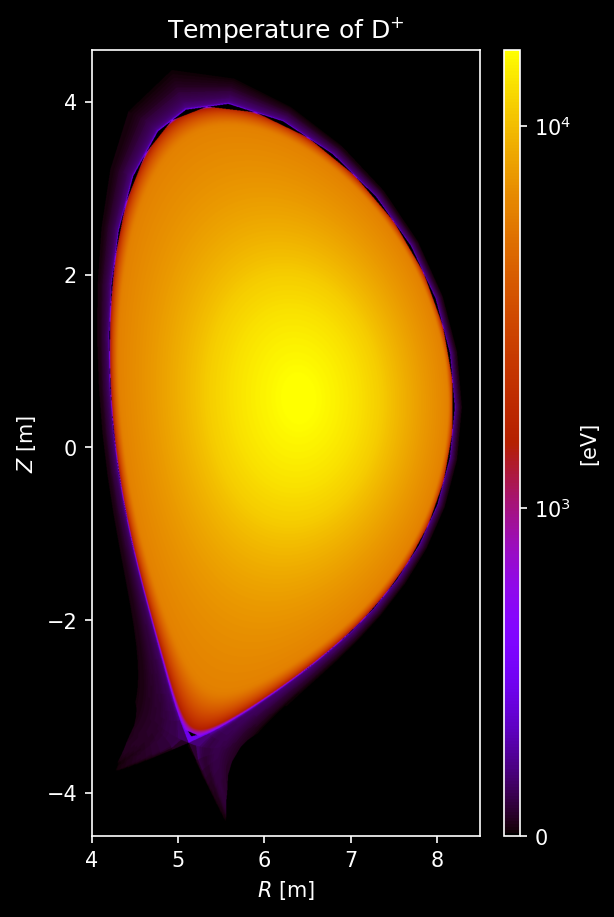

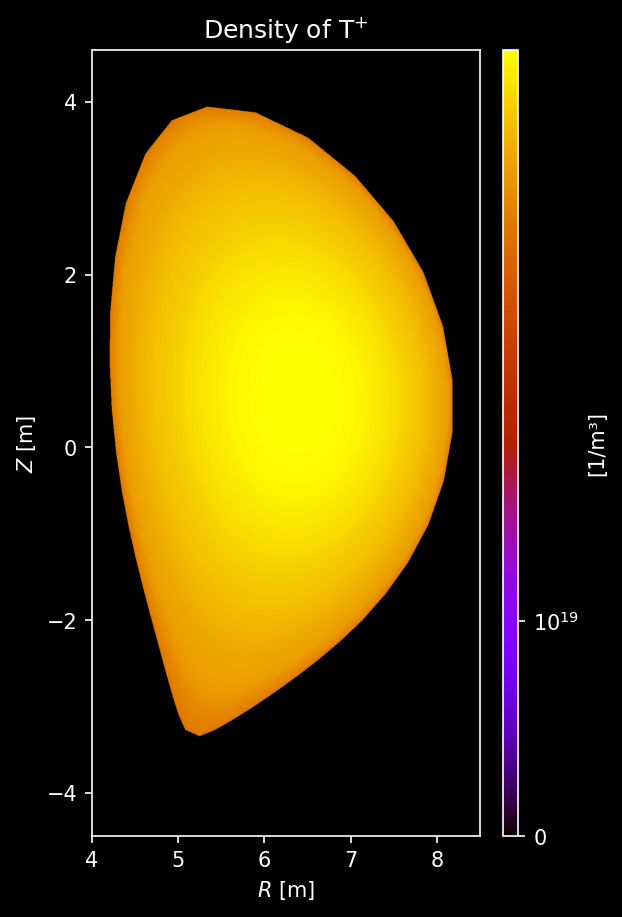

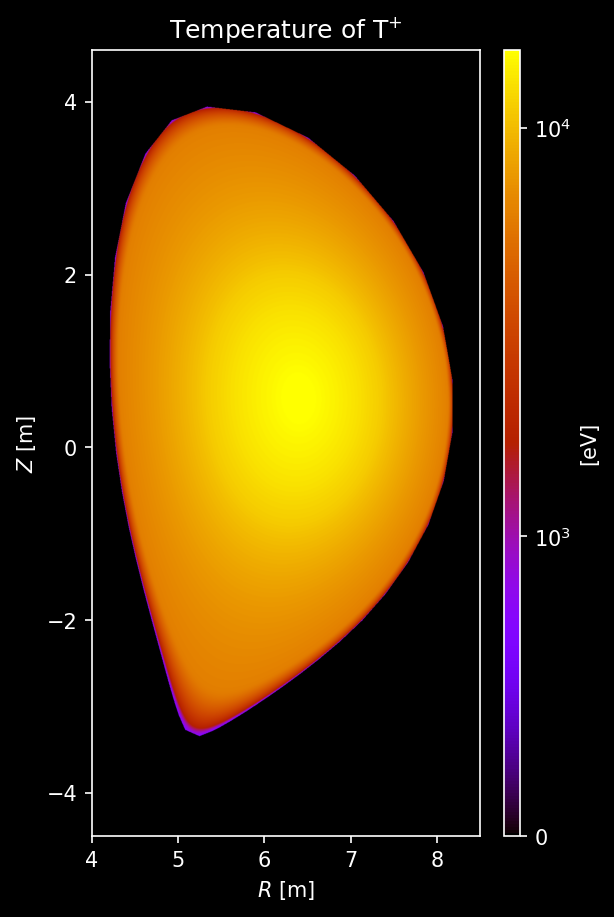

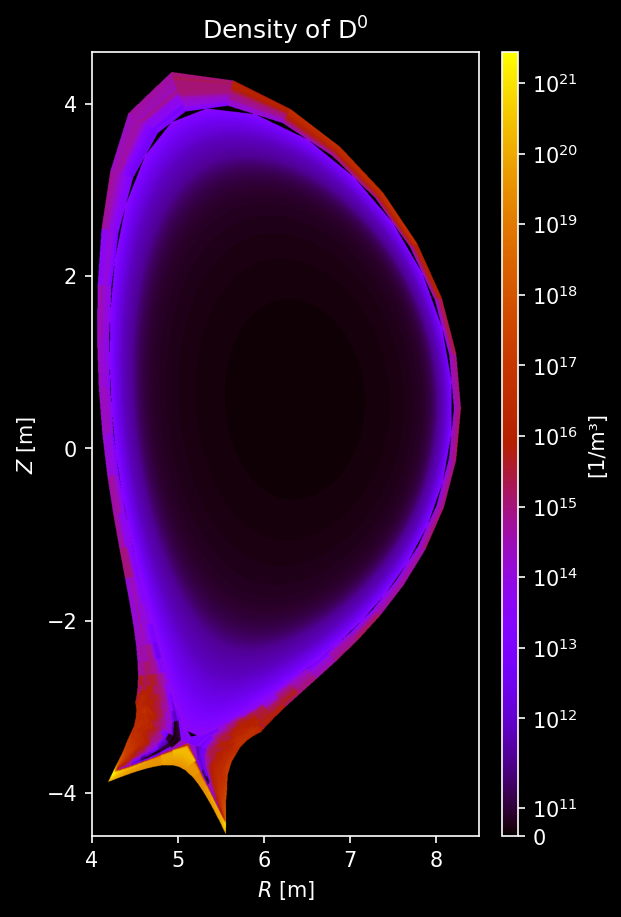

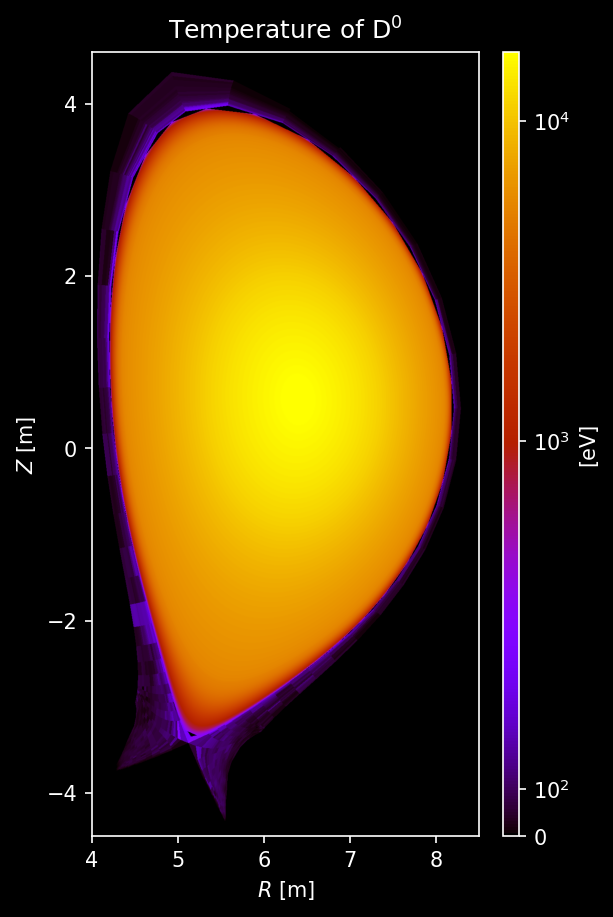

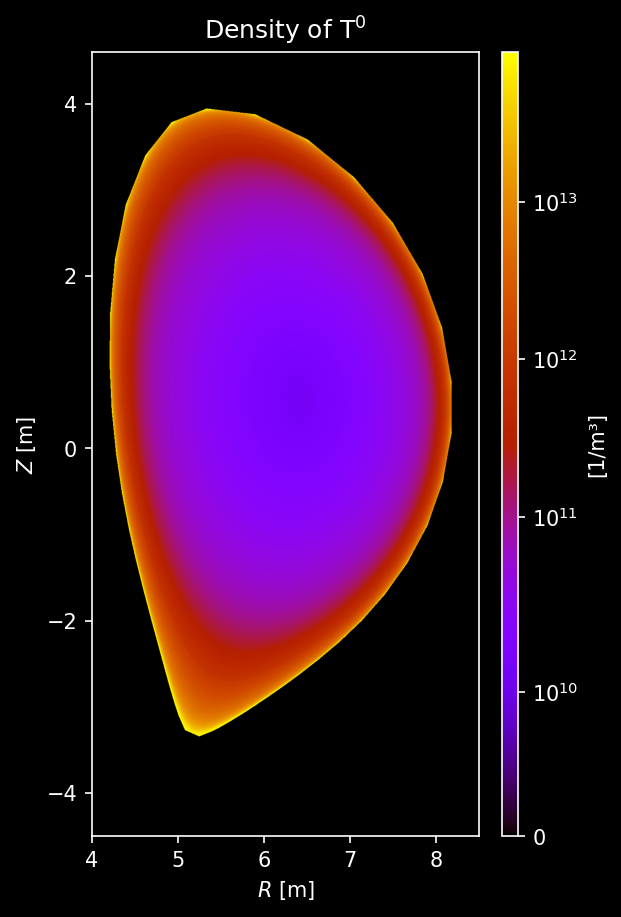

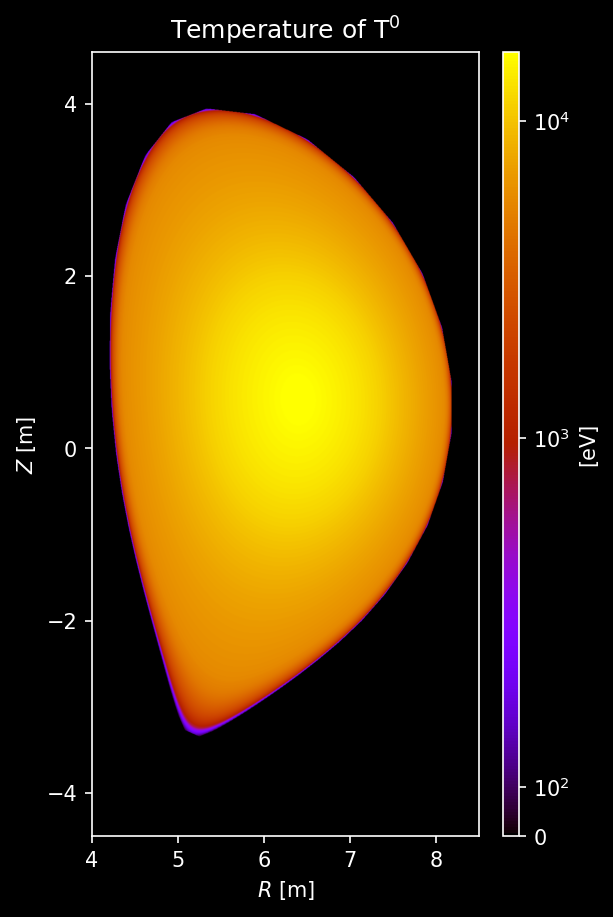

In [8]:
for species in plasma.composition:
    # Construct element label
    if species.charge == 0:
        label = f"{species.element.symbol}$^{{0}}$"
    elif species.charge == 1:
        label = f"{species.element.symbol}$^{{+}}$"
    else:
        label = f"{species.element.symbol}$^{{{species.charge}+}}$"

    # Extract only hydrogenic species
    if species.element.atomic_number == 1:
        # Sample density
        density = sample3d_grid(
            species.distribution.density,
            r_pts,
            [0],
            z_pts,
        ).squeeze()

        # Plot density
        fig = plot_quantity(
            density,
            extent,
            title="Density of " + label,
            clabel="[1/m³]",
            logscale=True,
        )

        # Sample temperature
        temperature = sample3d_grid(
            species.distribution.effective_temperature,
            r_pts,
            [0],
            z_pts,
        ).squeeze()

        # Plot deutrium temperature
        fig = plot_quantity(
            temperature,
            extent,
            title="Temperature of " + label,
            clabel="[eV]",
            logscale=True,
        )

### Helium atom/ion density profiles

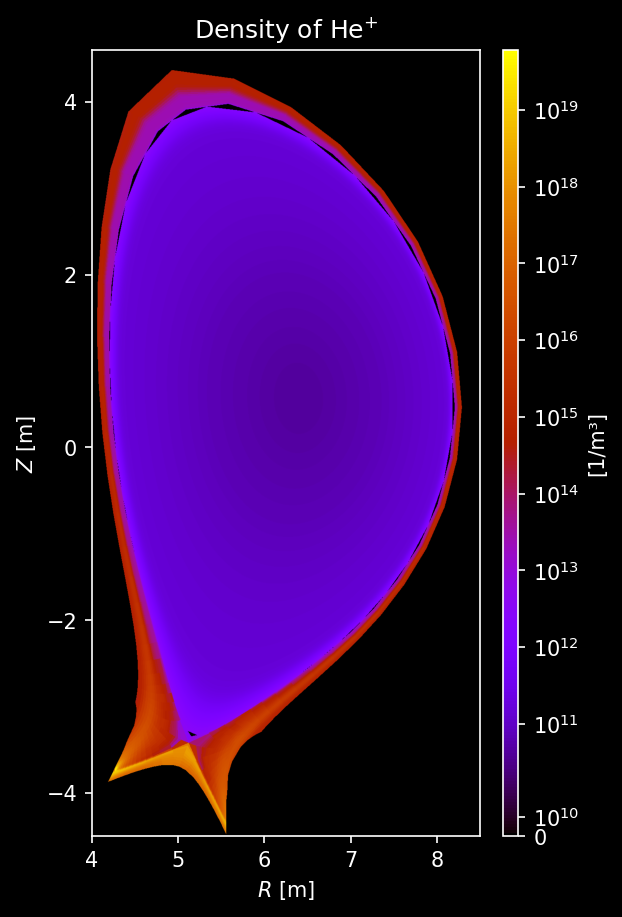

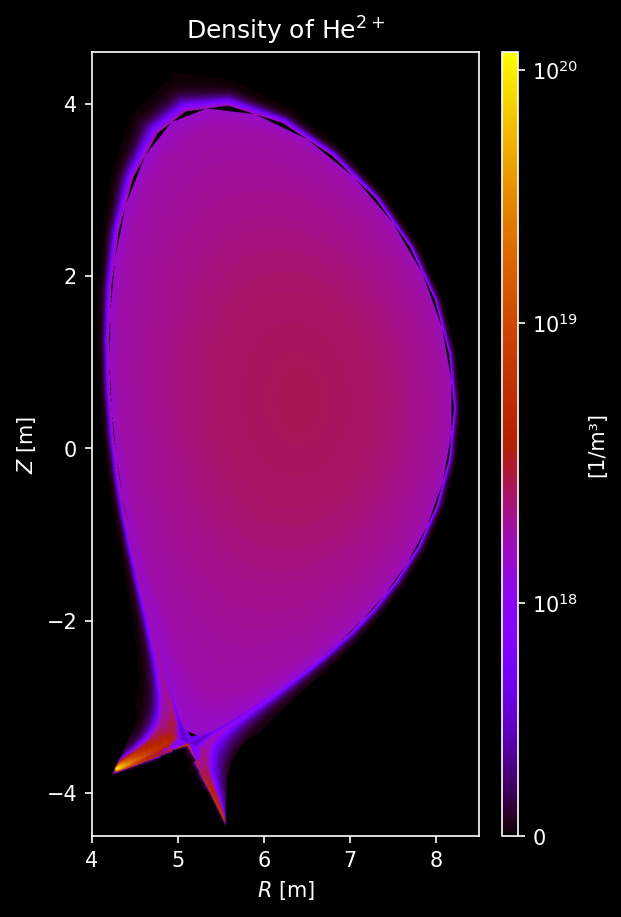

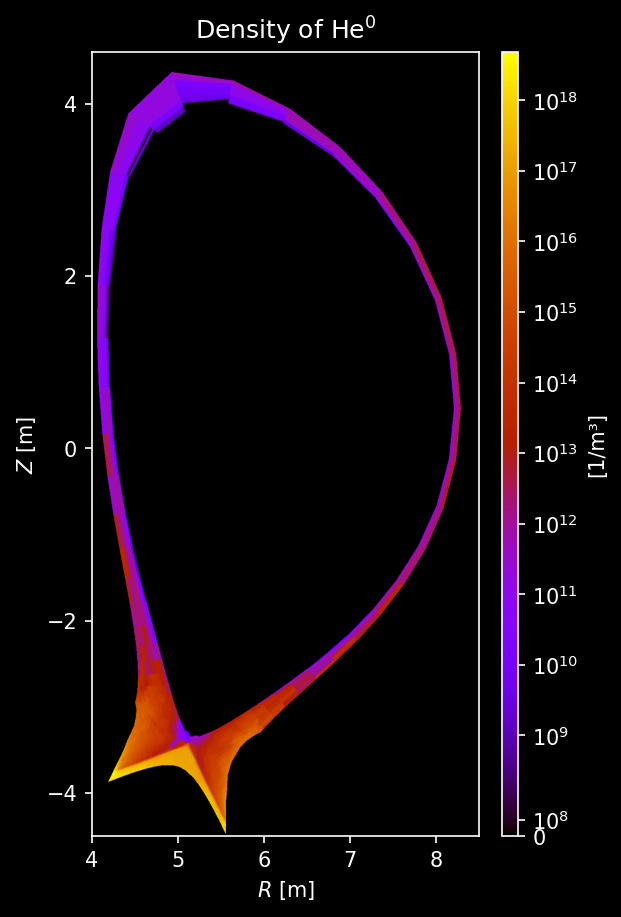

In [9]:
for species in plasma.composition:
    # Construct element label
    if species.charge == 0:
        label = f"{species.element.symbol}$^{{0}}$"
    elif species.charge == 1:
        label = f"{species.element.symbol}$^{{+}}$"
    else:
        label = f"{species.element.symbol}$^{{{species.charge}+}}$"

    # Extract only Helium species
    if species.element.atomic_number == 2:
        # Sample density
        density = sample3d_grid(
            species.distribution.density,
            r_pts,
            [0],
            z_pts,
        ).squeeze()

        # Plot density
        fig = plot_quantity(
            density,
            extent,
            title="Density of " + label,
            clabel="[1/m³]",
            logscale=True,
        )

### Other species' density

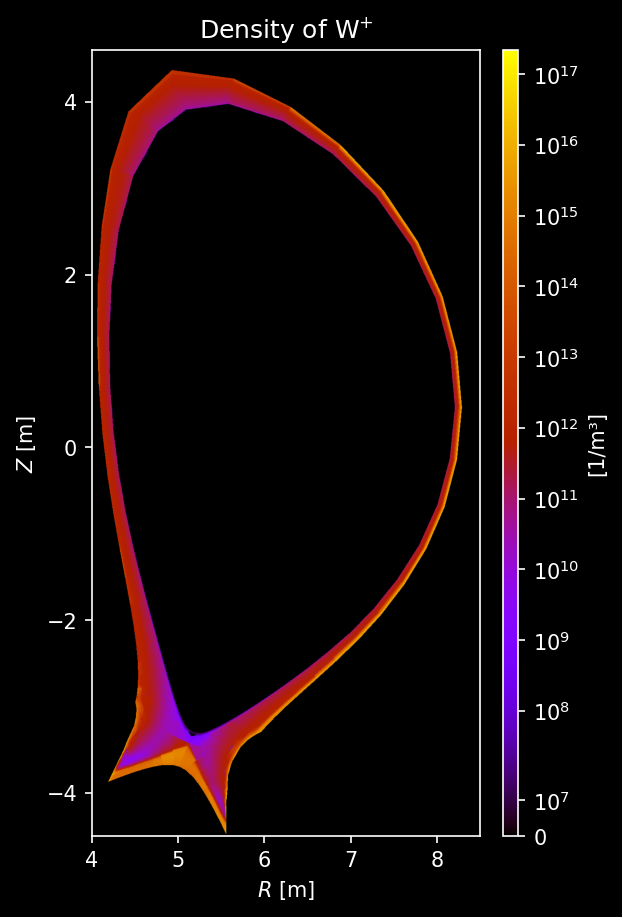

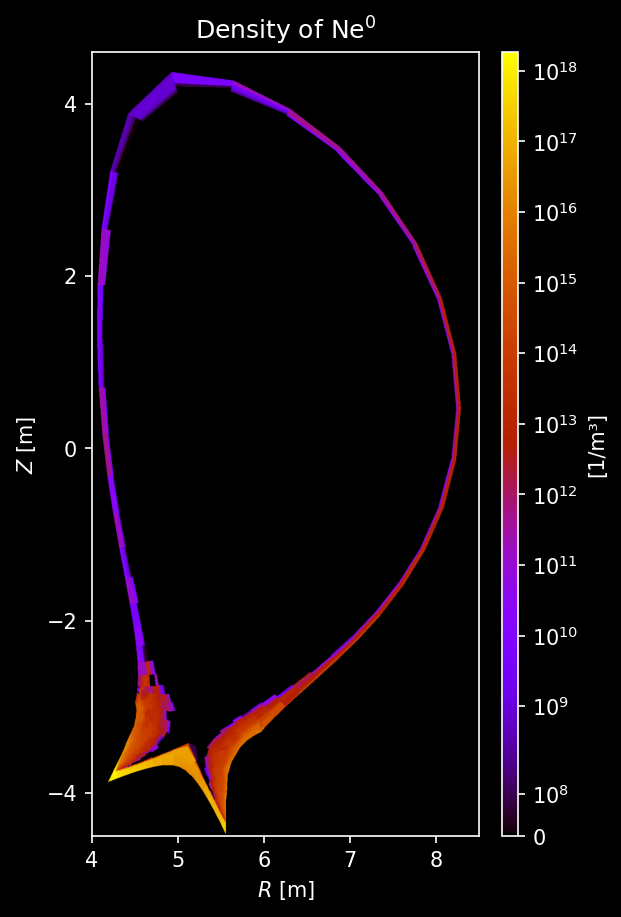

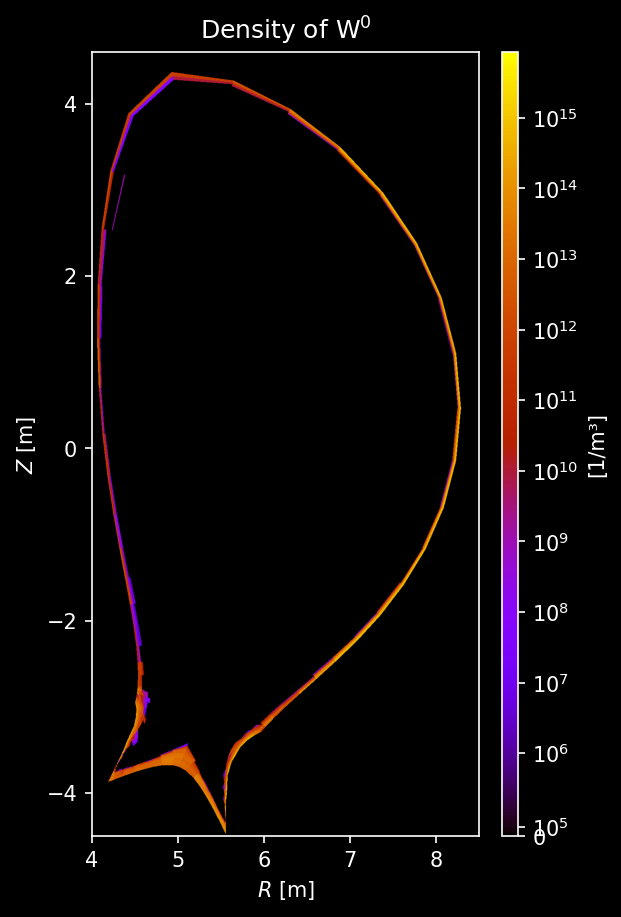

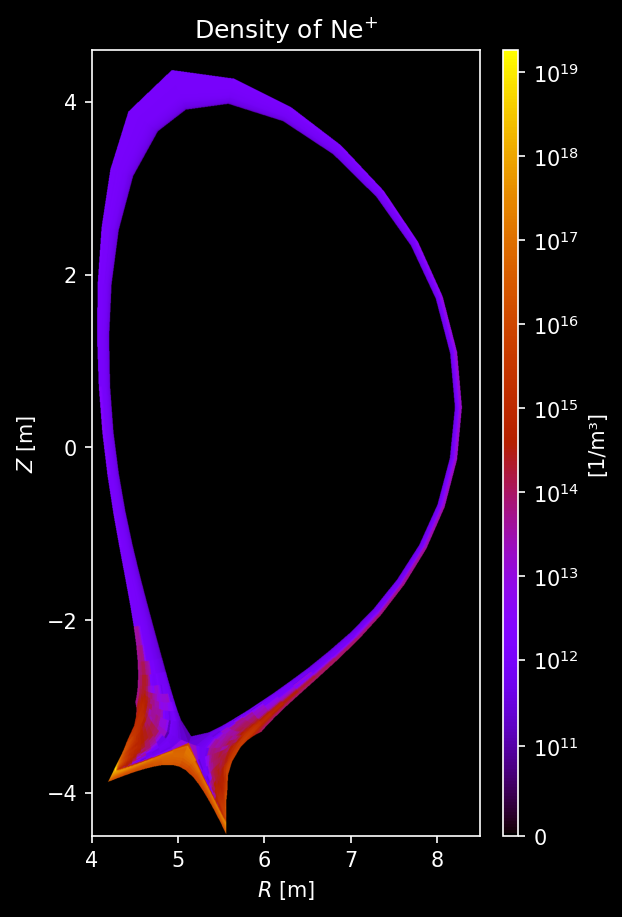

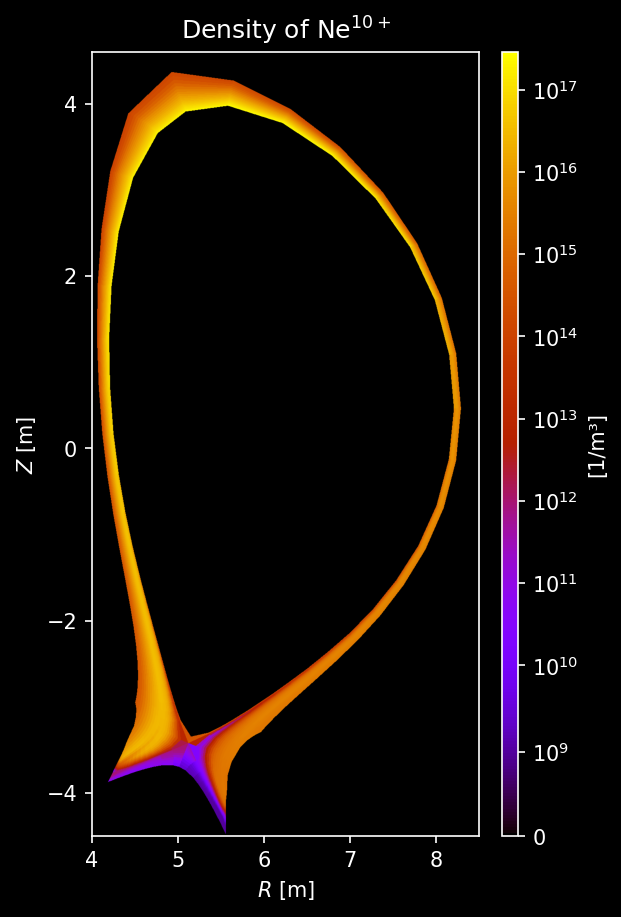

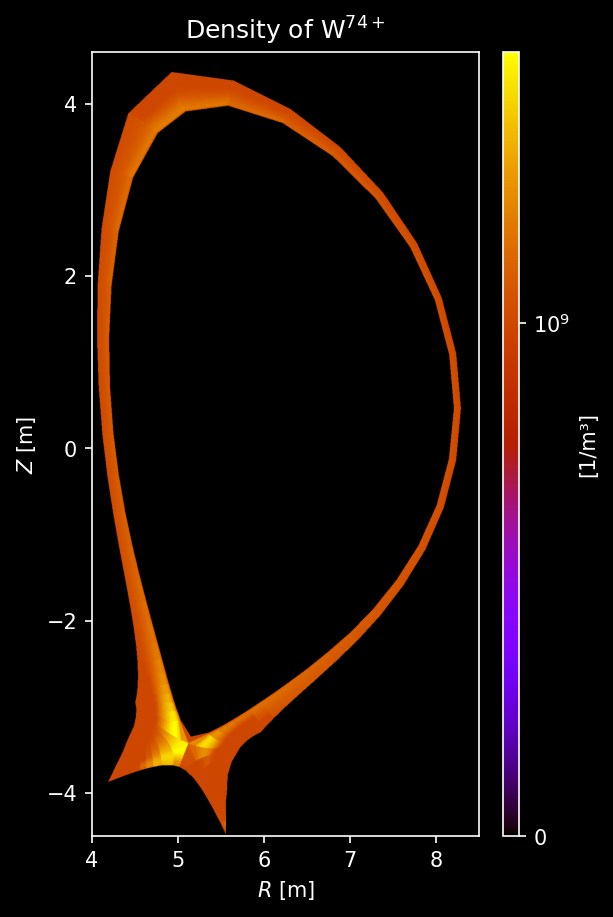

In [10]:
for species in plasma.composition:
    # Construct element label
    if species.charge == 0:
        label = f"{species.element.symbol}$^{{0}}$"
    elif species.charge == 1:
        label = f"{species.element.symbol}$^{{+}}$"
    else:
        label = f"{species.element.symbol}$^{{{species.charge}+}}$"

    # Extract only non-hydrogenic and non-Helium species
    if species.element.atomic_number != 1 and species.element.atomic_number != 2:
        # Sample density
        density = sample3d_grid(
            species.distribution.density,
            r_pts,
            [0],
            z_pts,
        ).squeeze()

        density[density < 0] = 0.0

        # Plot density
        fig = plot_quantity(
            density,
            extent,
            title="Density of " + label,
            clabel="[1/m³]",
            logscale=True,
        )